# Plotting with Series

### Loading Libraries

In [51]:
# Numerical Computing
import numpy as np
# Data Manipulation
import pandas as pd
# Data Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/mattharrison/datasets/master/data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url)

In [3]:
dates = pd.to_datetime(alta_df.DATE)

In [4]:
snow = (alta_df
   .SNOW
   .rename(dates)
)

In [5]:
snow

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64

#### Histograms

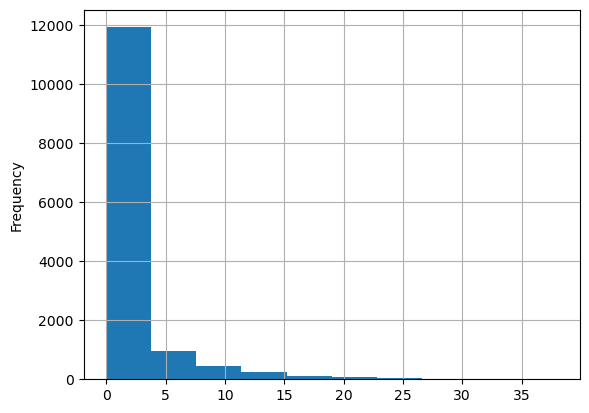

In [9]:
snow.plot.hist()
plt.grid(True)
plt.show()

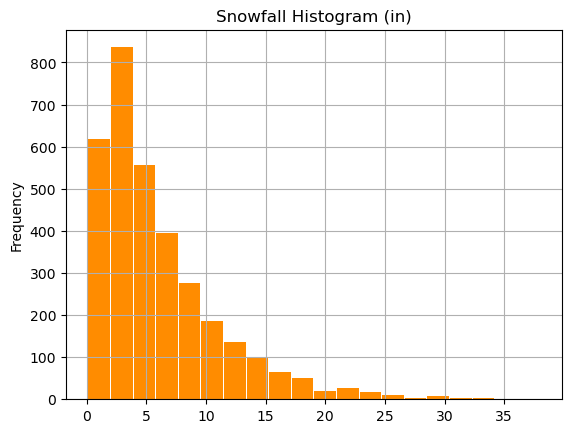

In [15]:
snow[snow > 0].plot.hist(bins=20, rwidth=0.95, color='darkorange', title='Snowfall Histogram (in)')
plt.grid(True)
plt.show()

#### Box Plot

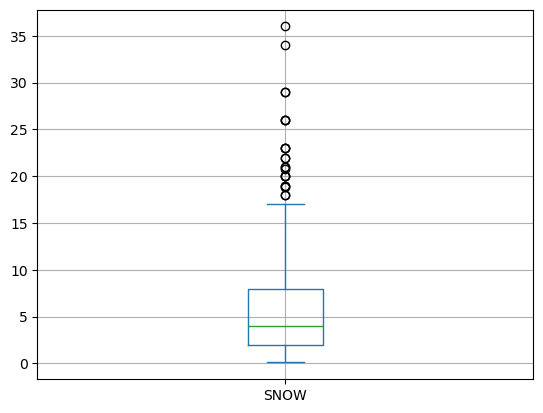

In [20]:
(snow
 [lambda s:(s.index.month == 1) & (s>0)]
 .plot.box()
)
plt.grid(True)
plt.show()

#### Kernel Density Estimation Plot

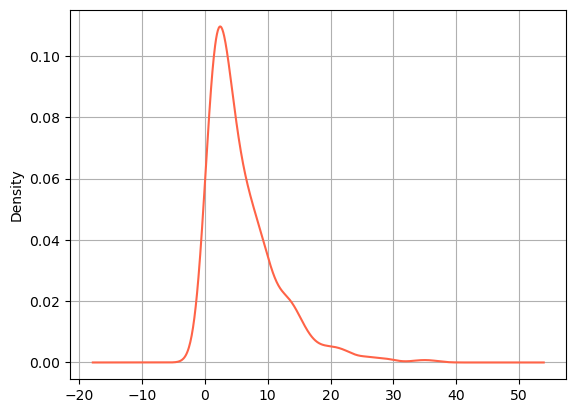

In [22]:
(snow
 [lambda s:(s.index.month == 1) & (s>0)]
 .plot.kde(color='tomato')
)
plt.grid(True)
plt.show()

#### Line Plots

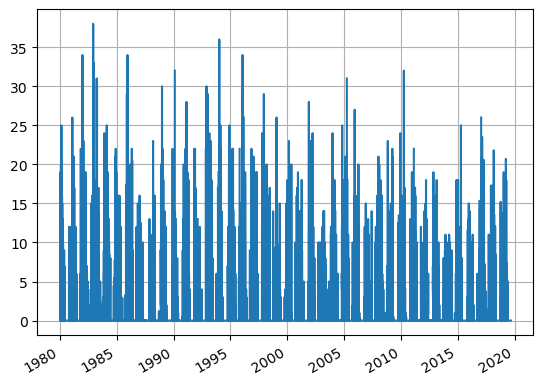

In [28]:
snow.plot.line()
plt.grid(True)
plt.show()

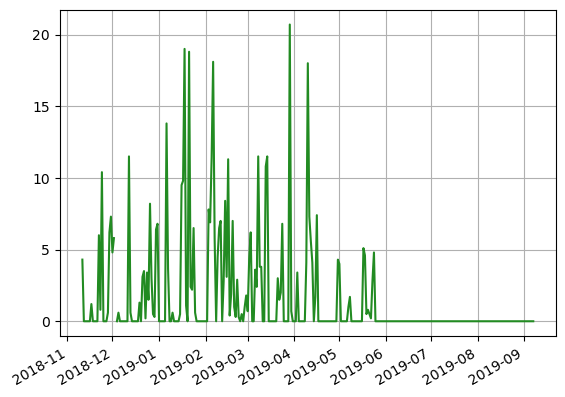

In [29]:
(snow
 .iloc[-300:]
 .plot.line(color='forestgreen')
)
plt.grid(True)
plt.show()

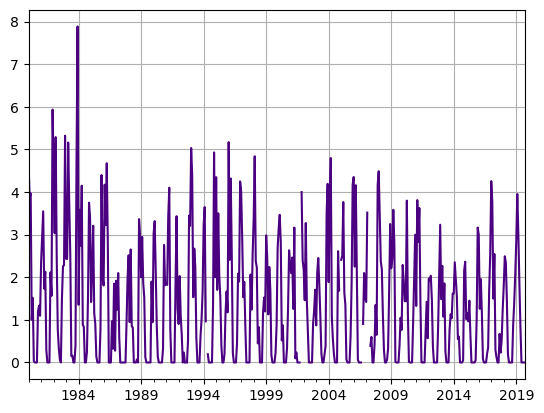

In [31]:
(snow
 .resample('M')
 .mean()
 .plot.line(color='indigo')
)
plt.grid(True)
plt.show()

#### Line Plots with Multiple Aggregations

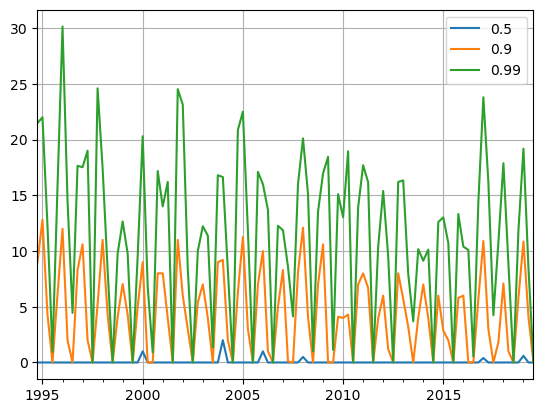

In [34]:
(snow
 .resample('Q')
 .quantile([.5, .9, .99])
 .unstack()
 .iloc[-100:]
 .plot.line()
)
plt.grid(True)
plt.show()

#### Bar Plots

In [35]:
season2017 = (snow.loc['2016-10':'2017-05'])

In [37]:
(season2017
 .resample('M')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
)

October      2.153969
November     9.772637
December    15.715995
January     25.468688
February    21.041085
March        9.274033
April       14.738732
May          1.834862
Name: SNOW, dtype: float64

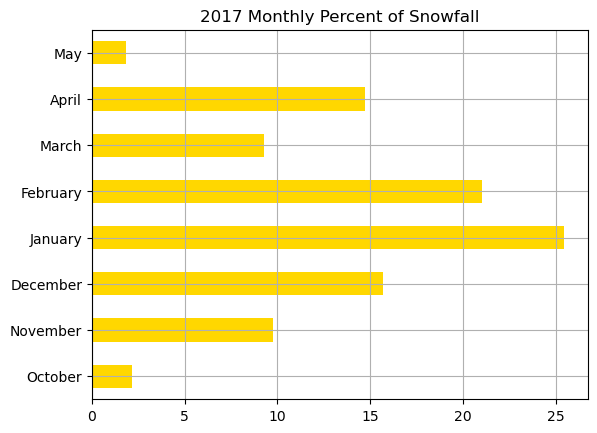

In [39]:
# Plotting Bars
(season2017
 .resample('M')
 .sum()
 .div(season2017.sum())
 .mul(100)
 .rename(lambda idx: idx.month_name())
 .plot.barh(color='gold', title='2017 Monthly Percent of Snowfall')
)
plt.grid(True)
plt.show()

### Using Vehicle's Data

In [40]:
file_path = '/Users/isisromero/desktop/effective_pandas/data/vehicles.csv'
df = pd.read_csv(file_path, low_memory=False)

In [44]:
make = df.make

In [45]:
make.value_counts()

make
Chevrolet                           4003
Ford                                3371
Dodge                               2583
GMC                                 2494
Toyota                              2071
                                    ... 
E. P. Dutton, Inc.                     1
Fisker                                 1
Panoz Auto-Development                 1
Environmental Rsch and Devp Corp       1
Grumman Allied Industries              1
Name: count, Length: 136, dtype: int64

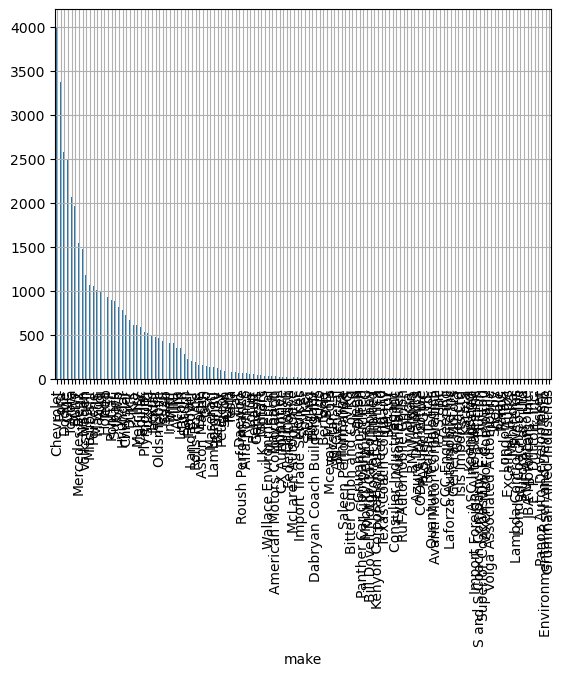

In [47]:
(make
    .value_counts()
    .plot.bar()
    )
plt.grid(True)
plt.show()

In [48]:
top10 = make.value_counts().index[:10]

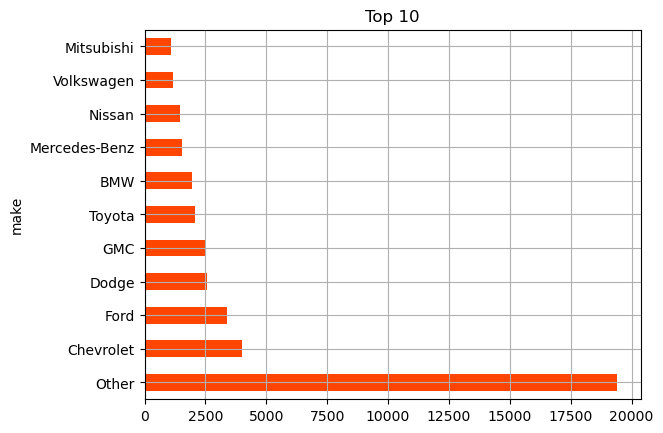

In [50]:
(make
 .where(make.isin(top10), 'Other')
 .value_counts()
 .plot.barh(color='orangered', title='Top 10')
)
plt.grid(True)
plt.show()

#### Styling

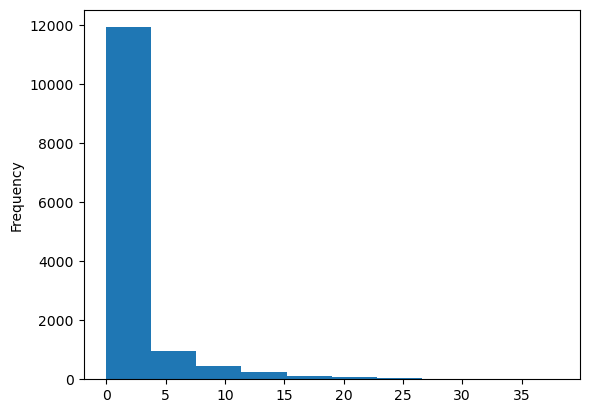

In [54]:
color_palette = ["#440154", "#482677", "#404788", "#33638d", "#287d8e",
                 "#1f968b", "#29af7f", "#55c667", "#73d055", "#b8de29", "#fde725"]
fp = matplotlib.font_manager.FontProperties(
    fname='/Font/roboto/Roboto-Condensed.ttf')
with sns.plotting_context(rc=dict(font='Roboto', palette=color_palette)):
    snow.plot.hist()
    #fig.savefig('snowhist.png', dpi=600, bbox_inches='tight')

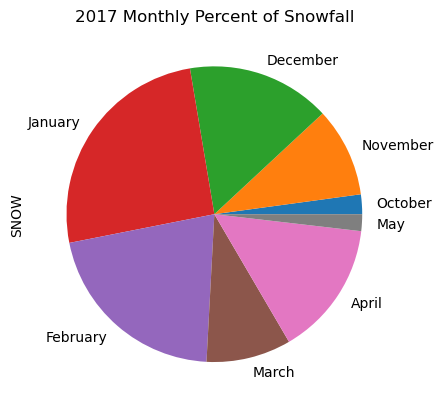

In [56]:
(season2017
  .resample('M')
  .sum()
  .div(season2017.sum())
  .mul(100)
  .rename(lambda idx: idx.month_name())
  .plot.pie(title='2017 Monthly Percent of Snowfall')
)
plt.grid(True)
plt.show()